## Supervised Learning in the Perceptron Neuron

### Team Members
- **Juliana Ballin Lima** – Registration: 2315310011  
- **Marcelo Heitor de Almeida Lira** – Registration: 2315310043  
- **Lucas Maciel Gomes** – Registration: 2315310014  
- **Ryan da Silva Marinho** – Registration: 2315310047  
- **Vitória Gabrielle Kinshasa Silva de Almeida** – Registration: 2415280044 

In [126]:
"""
Libraries required for the project.
Mandatory: numpy, random, math, matplotlib.
sklearn is allowed only for performance metrics.
"""

import math
import random

import matplotlib.pyplot as plt
import numpy as np
from prettytable import PrettyTable
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)


In [127]:
"""
Display team members in a structured way.
This ensures clarity and meets evaluation criteria.
"""

team_members: dict[str, str] = {
    "Juliana Ballin Lima": "2315310011",
    "Marcelo Heitor de Almeida Lira": "2315310043",
    "Lucas Maciel Gomes": "2315310014",
    "Ryan da Silva Marinho": "2315310047",
    "Vitória Gabrielle Kinshasa Silva de Almeida": "2415280044"
}

for name, reg in team_members.items():
    print(f"{name} - {reg}")

Juliana Ballin Lima - 2315310011
Marcelo Heitor de Almeida Lira - 2315310043
Lucas Maciel Gomes - 2315310014
Ryan da Silva Marinho - 2315310047
Vitória Gabrielle Kinshasa Silva de Almeida - 2415280044


In [128]:
"""
Calculate team identifier based on the sum of the last digits
of registration numbers, applying modulo 4.
"""

# Last digits of registrations
ids: list[int] = [1, 3, 4, 7, 4]
team_sum: int = sum(ids)
team_identifier: int = team_sum % 4

print("Team identifier:", team_identifier)

Team identifier: 3


In [129]:
"""
Utility functions for the Perceptron algorithm.
Includes activation and training procedure.
"""

def activation_function(u: float) -> int:
    """
    Step activation function with threshold θ = 0.

    Args:
        u (float): Linear combination input

    Returns:
        int: 1 if u >= 0 else 0.
    """
    return 1 if u >= 0 else 0


def perceptron_train(X, y, eta=0.1, max_epochs=1000, initial_weights=None) -> tuple[np.ndarray, int, int, np.ndarray | None]:
    """
    Perceptron training until convergence or max_epochs.

    Args:
        X (ndarray): input data with bias
        y (ndarray): labels (0 or 1)
        eta (float): learning rate
        max_epochs (int): maximum iterations
        initial_weights (ndarray): optional starting weights

    Returns:
        tuple: (final_weights, epochs, adjustments, initial_weights)
    """
    if initial_weights is None:
        rng = np.random.default_rng()
        w = rng.uniform(-0.5, 0.5, X.shape[1])
    else:
        w = initial_weights.copy()

    adjustments = 0
    epoch = 0

    while epoch < max_epochs:
        error_count = 0
        for i in range(len(X)):
            u = np.dot(X[i], w)
            y_hat = 1 if u >= 0 else 0
            e = y[i] - y_hat
            if e != 0:
                w += eta * e * X[i]
                adjustments += 1
                error_count += 1
        if error_count == 0:
            break
        epoch += 1

    return w, epoch, adjustments, initial_weights


In [130]:
"""
Utility to load datasets provided by the professor.
Files were saved in raw binary format using numpy.tofile().
Each row has (x1, x2, yd).
"""

def load_dataset(path: str) -> np.ndarray:
    """Load dataset from binary file and reshape to (m, 3)."""
    return np.fromfile(path, dtype=np.float64).reshape(-1, 3)

## Part I: Linearly Separable Problem

In [131]:
"""
Load the dataset dataAll.txt for Part I.
Split into features (X) and labels (y).
Add bias term (column of ones).
"""

# Load dataset
data = load_dataset("data/dataAll.txt")

# Features and labels
X = data[:, :2]
y = data[:, 2].astype(int)

# Add bias
X_bias = np.c_[np.ones(X.shape[0]), X]

print("--- Dataset loaded ---")
print("Shape:", data.shape)
print("Class distribution:", np.bincount(y))
print("First 5 rows:\n", data[:5])

--- Dataset loaded ---
Shape: (1000, 3)
Class distribution: [476 524]
First 5 rows:
 [[-363.7884  244.1423    0.    ]
 [ 328.7572 -256.7658    1.    ]
 [-164.9827  613.2164    0.    ]
 [ 536.5905  764.9575    0.    ]
 [ 314.2297  343.8375    0.    ]]


In [132]:
"""
Split dataset into input features (X) and labels (y).
Add bias term (column of ones) to X.
"""

# Features and labels
X = data[:, :2]
y = data[:, 2].astype(int)

# Add bias
X_bias = np.c_[np.ones(X.shape[0]), X]

print("X_bias shape:", X_bias.shape)
print("y distribution:", np.bincount(y))

X_bias shape: (1000, 3)
y distribution: [476 524]


In [133]:
"""
Train the Perceptron on the linearly separable dataset.
Learning rate η = 0.1 (as specified in the assignment).
"""

# Generate initial weights using np.random.Generator
rng = np.random.default_rng()
initial_weights = rng.uniform(-0.5, 0.5, X_bias.shape[1])

# Train using the same initial weights
weights, epochs, adjustments, used_init = perceptron_train(
    X_bias, y, eta=0.1, initial_weights=initial_weights
)

# Results
print("--- Training finished ---")
print(f"Initial weights: {used_init}")
print(f"Final weights: {weights}")
print(f"Epochs until convergence: {epochs}")
print(f"Total adjustments: {adjustments}")


--- Training finished ---
Initial weights: [-0.34641138 -0.181223    0.2939774 ]
Final weights: [ 1.53588623e-01  3.23227807e+02 -3.23216863e+02]
Epochs until convergence: 3
Total adjustments: 55


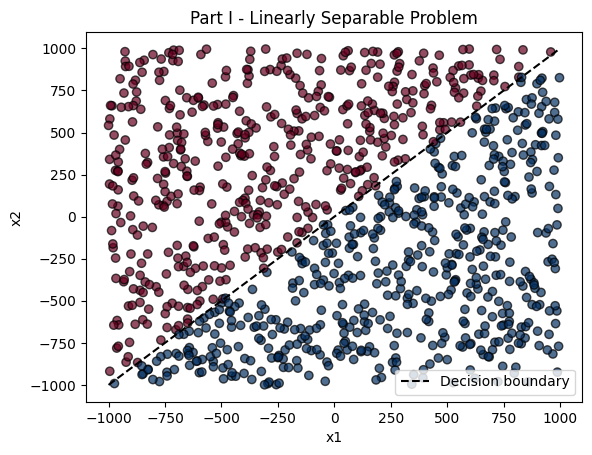

In [134]:
"""
Plot dataset points and decision boundary learned by the Perceptron.
Class 0 = red, Class 1 = blue.
"""

# Scatter plot with class colors
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="RdBu", edgecolors="k", alpha=0.7)

# Compute decision boundary line
x_vals = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
y_vals = -(weights[0] + weights[1] * x_vals) / weights[2]

plt.plot(x_vals, y_vals, "k--", label="Decision boundary")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Part I - Linearly Separable Problem")
plt.legend()
plt.show()

## Part II: Experimentation

In [135]:
"""
Experiment with multiple configurations of learning rate and
weight initialization intervals. Perform 10 runs for each setup.
"""

# Load dataset
data_p2 = load_dataset("data/data3.txt")

# Features and labels
X_p2 = data_p2[:, :2]
y_p2 = data_p2[:, 2].astype(int)

# Add bias
X_p2_bias = np.c_[np.ones(X_p2.shape[0]), X_p2]

print("--- Dataset loaded ---")
print("X_bias shape:", X_p2_bias.shape)
print("y distribution:", np.bincount(y_p2))
print("\nFirst 5 rows:\n", data[:5])

--- Dataset loaded ---
X_bias shape: (600, 3)
y distribution: [300 300]

First 5 rows:
 [[-363.7884  244.1423    0.    ]
 [ 328.7572 -256.7658    1.    ]
 [-164.9827  613.2164    0.    ]
 [ 536.5905  764.9575    0.    ]
 [ 314.2297  343.8375    0.    ]]


In [136]:
def perceptron_train_exp(X_p2, y_p2, eta=0.1, weight_range=(-0.5, 0.5)) -> tuple[np.ndarray, int, int, np.ndarray]:
    """
    Perceptron training until convergence.

    Args:
        X_p2 (ndarray): input data with bias
        y_p2 (ndarray): labels (0 or 1)
        eta (float): learning rate
        max_epochs (int): maximum iterations
        weight_range (list[float]): starting weights

    Returns:
        tuple: (final_weights, epochs, adjustments, initial_weights)
    """
    rng = np.random.default_rng()
    w: np.ndarray = rng.uniform(weight_range[0], weight_range[1], X_p2.shape[1])
    initial_weights_print: np.ndarray = w.copy()

    adjustments = 0
    epoch = 0

    # Using while until the error_cont == 0)
    # This always will converge because the problem is linearly separable
    while True:
        error_count = 0
        for i in range(len(X_p2)):
            u = np.dot(X_p2[i], w)
            y_hat = 1 if u >= 0 else 0
            e = y_p2[i] - y_hat
            if e != 0:
                w += eta * e * X_p2[i]
                adjustments += 1
                error_count += 1

        epoch += 1
        if error_count == 0:
            break

    return w, epoch, adjustments, initial_weights_print

In [137]:
# Hyperparameters to be tested
learning_rates: list[float] = [0.4, 0.1, 0.01]
weight_intervals: list[tuple[float, float]] = [(-100.0, 100.0), (-0.5, 0.5)]
num_repetitions = 10

# List for results
final_results = []

In [138]:
for eta in learning_rates:
    # Loop for each weigh_intervals
    for interval in weight_intervals:

        # Temporary lists to store the 10 repeats results for each config
        adjustments_temp = []
        epochs_temp = []

        for _ in range(num_repetitions):
            _, epochs, adjustments, _ = perceptron_train_exp(
                X_p2_bias, y_p2, eta=eta, weight_range=interval
            )

            adjustments_temp.append(adjustments)
            epochs_temp.append(epochs)


        mean_adjustments = np.mean(adjustments_temp)
        std_adjustments = np.std(adjustments_temp)

        min_epochs = min(epochs_temp)

        final_results.append({
            "eta": eta,
            "interval": interval,
            "mean_adj": mean_adjustments,
            "std_adj": std_adjustments,
            "min_epochs": min_epochs
        })


In [139]:
table = PrettyTable()
table.field_names = [
    "Taxa de Aprendizado",
    "Intervalo de Pesos",
    "Quantidade de Ajustes (Média ± Desvio Padrão)",
    "Menor Nº de Épocas"
]

In [140]:
for result in final_results:
    adj_str: str = f"{result['mean_adj']:.2f} ± {result['std_adj']:.2f}"

    table.add_row([
        f"η = {result['eta']}",
        f"{result['interval']}",
        adj_str,
        result["min_epochs"]
    ])

print(table)

+---------------------+--------------------+-----------------------------------------------+--------------------+
| Taxa de Aprendizado | Intervalo de Pesos | Quantidade de Ajustes (Média ± Desvio Padrão) | Menor Nº de Épocas |
+---------------------+--------------------+-----------------------------------------------+--------------------+
|       η = 0.4       |  (-100.0, 100.0)   |                314.10 ± 153.49                |         7          |
|       η = 0.4       |    (-0.5, 0.5)     |                  9.50 ± 3.26                  |         3          |
|       η = 0.1       |  (-100.0, 100.0)   |                1567.00 ± 789.64               |         12         |
|       η = 0.1       |    (-0.5, 0.5)     |                  10.60 ± 5.87                 |         2          |
|       η = 0.01      |  (-100.0, 100.0)   |               13517.80 ± 5670.71              |         60         |
|       η = 0.01      |    (-0.5, 0.5)     |                 57.30 ± 34.92              

### Discussão

Intervalo de pesos é crucial: Um intervalo grande: (-100, 100) tornou o treinamento instável, apresentando um desvio padrão alto e exigindo um número muito maior de ajustes para a convergência.

Taxa de aprendizado afeta a eficiência: Uma taxa de aprendizado alta (η = 0.4) precisou de menos ajustes para convergir. Enquanto que taxa muito baixa (η = 0.01) foi a mais ineficiente, precisando de muitas correções.

Melhor configuração: A configuração de η = 0.4 e intervalo (-0.5, 0.5) foi a melhor, pois apresentou a combinação ideal de eficiência (menor média de ajustes) e estabilidade (menor desvio padrão), tornando o treinamento mais rápido e previsível.

## Part III: Holdout Validation

In [141]:
"""
Holdout validation using dataHoldout.txt.
Split into 70% training / 30% testing.
Compute metrics: confusion matrix, accuracy, precision, recall, F1.
"""

'\nHoldout validation using dataHoldout.txt.\nSplit into 70% training / 30% testing.\nCompute metrics: confusion matrix, accuracy, precision, recall, F1.\n'

## Conclusions